##### Deepiction V.0.4

## **Train and Test Deep Neural Networks**
- Tensorflow: unet, resnet
- Pytorch: unet_ten, unet_n2n

**1. Import the dependencies**

In [1]:
import numpy as np
import os
from deepiction.imagedataset import ImageDataset
from deepiction.prediction import Prediction
from deepiction.training import Training
from deepiction.tools import report_resources
import warnings
warnings.filterwarnings("ignore")
report_resources()

/Users/sage/miniforge3/envs/dl/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Resources
Current path: /Users/sage/Desktop/code/current
GPU available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow Version:  2.11.0
Pytorch GPU available:  mps


/Users/sage/miniforge3/envs/dl/lib/python3.8/site-packages/bioimageio/spec/shared/_resolve_source.py:433: CacheWarning: found cached /var/folders/bw/9rf7h6pd243d6rglv843lnnh0000gn/T/sage/bioimageio_cache/https/raw.githubusercontent.com/bioimage-io/bioimage.io/main/site.config.json. Skipping download of https://raw.githubusercontent.com/bioimage-io/bioimage.io/main/site.config.json.
  warnings.warn(f"found cached {local_path}. Skipping download of {uri}.", category=CacheWarning)
/Users/sage/miniforge3/envs/dl/lib/python3.8/site-packages/bioimageio/spec/shared/_resolve_source.py:433: CacheWarning: found cached /var/folders/bw/9rf7h6pd243d6rglv843lnnh0000gn/T/sage/bioimageio_cache/https/bioimage-io.github.io/collection-bioimage-io/collection.json. Skipping download of https://bioimage-io.github.io/collection-bioimage-io/collection.json.
  warnings.warn(f"found cached {local_path}. Skipping download of {uri}.", category=CacheWarning)


**2. Selection of the dataset**
- task
    - binary: pixel classification, input 1 grayscale channel, output mask class=0 or class=1
    - nclass: pixel classification in n class, input 1 grayscale channel, output labels
    - regress: regression, input 1 grayscale channel, output 1 grayscale channel
- norm: (training, test)
    - minmax
    - div255
    - none

In [2]:
dataname, task, norm = 'clothes', 'nclass', ('minmax', 'none')
dataname, task, norm = 'simulation-object-256-8-2', 'nclass', ('minmax', 'none')
dataname, task, norm = 'simulation-dmap-256-8-1', 'regres', ('minmax', 'none')
dataname, task, norm = 'simulation-class-256-8-3', 'nclass', ('minmax', 'none')
dataname, task, norm = 'degradation-noisy-p50', 'regres', ('none', 'none')
dataname, task, norm = 'simulation-binary-256-8-1', 'binary', ('minmax', 'none')
dataname, task, norm = 'ctc-glioblastoma', 'binary', ('minmax', 'none')

datapath  = f'/Users/sage/Desktop/datasets/{dataname}/'

# Training dataset
dataset = ImageDataset(datapath)
dataset.load_pairs(100, 'train/sources', 'train/targets')
dataset.normalization(norm)
dataset.report()


Dataset: Load pairs of images
/Users/sage/Desktop/datasets/ctc-glioblastoma/train/sources: 66 files
/Users/sage/Desktop/datasets/ctc-glioblastoma/train/targets: 66 files

Summary Source: (66, 512, 512, 1) 162  <-> Target:  (66, 512, 512, 1) 2


,Filename,Source,Type S,Min S,Max S,Mean S,Std S,Target,Type T,Min T,Max T,Mean T,Std T
0,0000.png,"(512, 512, 1)",float64,0,1,0.366,0.051,"(512, 512, 1)",uint8,0,1,0.078,0.269
1,0001.png,"(512, 512, 1)",float64,0,1,0.368,0.055,"(512, 512, 1)",uint8,0,1,0.067,0.25
2,0002.png,"(512, 512, 1)",float64,0,1,0.367,0.054,"(512, 512, 1)",uint8,0,1,0.091,0.287
3,0003.png,"(512, 512, 1)",float64,0,1,0.366,0.054,"(512, 512, 1)",uint8,0,1,0.085,0.279
4,0004.png,"(512, 512, 1)",float64,0,1,0.364,0.053,"(512, 512, 1)",uint8,0,1,0.063,0.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0061.png,"(512, 512, 1)",float64,0.1,1,0.355,0.047,"(512, 512, 1)",uint8,0,1,0.038,0.19
62,0062.png,"(512, 512, 1)",float64,0.1,1,0.354,0.046,"(512, 512, 1)",uint8,0,1,0.033,0.179
63,0063.png,"(512, 512, 1)",float64,0.1,1,0.355,0.048,"(512, 512, 1)",uint8,0,1,0.033,0.179
64,0064.png,"(512, 512, 1)",float64,0.1,1,0.36,0.061,"(512, 512, 1)",uint8,0,1,0.039,0.194


**3. Selection of the framework and the network**
- PT (tensorflow) PT-unet-ten, PT-unet-n2n
- TF (tensorflow) TF-unet, TF-resnet

In [3]:
netname, extension = 'PT-unet-ten', '.pt'  # PT-unet-n2n
netname, extension = 'TF-unet', '.hdf5'  # TF-resnet

**4. Training**


Build network TF-unet on TF batchnorm:False
Input  (512, 512, 1)
Number of outputs  1
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_30 (Conv2D)             (None, 512, 512, 16  160         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 activation_28 (Activation)     (None, 512, 512, 16  0           ['conv2d_30[0][0]']              
       

 conv2d_40 (Conv2D)             (None, 256, 256, 32  18464       ['concatenate_7[0][0]']          
                                )                                                                 
                                                                                                  
 activation_38 (Activation)     (None, 256, 256, 32  0           ['conv2d_40[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_41 (Conv2D)             (None, 256, 256, 32  9248        ['activation_38[0][0]']          
                                )                                                                 
                                                                                                  
 activation_39 (Activation)     (None, 256, 256, 32  0           ['conv2d_41[0][0]']              
          

                                )                                                                 
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 64, 64, 64)  0           ['activation_5[0][0]']           
                                                                                                  
 conv2d_6 (Conv2D)              (None, 64, 64, 128)  73856       ['max_pooling2d_2[0][0]']        
                                                                                                  
 activation_6 (Activation)      (None, 64, 64, 128)  0           ['conv2d_6[0][0]']               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 64, 64, 128)  147584      ['activation_6[0][0]']           
                                                                                                  
 activatio

Epoch 5/20
4/4 [==============================] - ETA: 0s - loss: 0.1071 - mse: 0.0329
Epoch 5: saving model to /Users/sage/Desktop/reports/ctc-glioblastoma/TF-unet-3P-16C-20E/model_best.hdf5
4/4 [==============================] - 2s 454ms/step - loss: 0.1071 - mse: 0.0329 - val_loss: 0.2161 - val_mse: 0.0540
Epoch 6/20
4/4 [==============================] - ETA: 0s - loss: 0.2059 - mse: 0.0466
Epoch 6: saving model to /Users/sage/Desktop/reports/ctc-glioblastoma/TF-unet-3P-16C-20E/model_best.hdf5
4/4 [==============================] - 2s 446ms/step - loss: 0.2059 - mse: 0.0466 - val_loss: 0.0742 - val_mse: 0.0244
Epoch 7/20
4/4 [==============================] - ETA: 0s - loss: 0.1527 - mse: 0.0412
Epoch 7: saving model to /Users/sage/Desktop/reports/ctc-glioblastoma/TF-unet-3P-16C-20E/model_best.hdf5
4/4 [==============================] - 2s 438ms/step - loss: 0.1527 - mse: 0.0412 - val_loss: 0.0783 - val_mse: 0.0254
Epoch 8/20
4/4 [==============================] - ETA: 0s - loss: 0

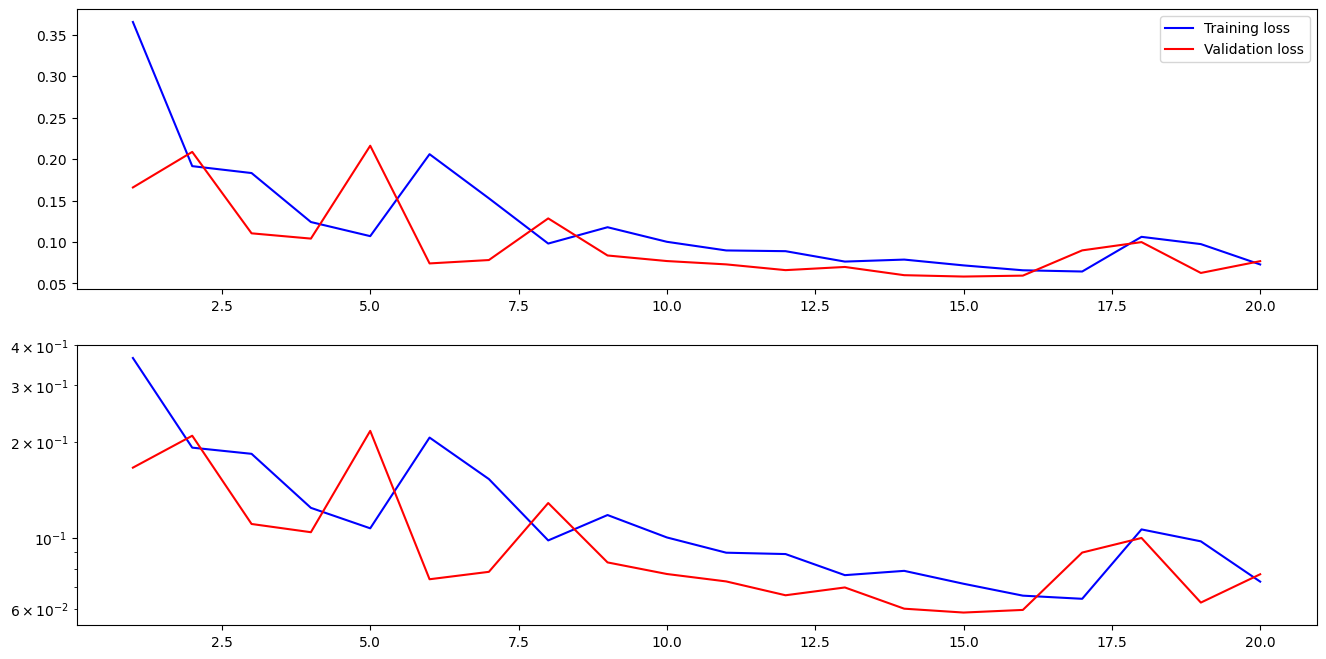

In [8]:
epochs = 20
npools, nchannels = 3, 16
batchnorm, dropout = False, 0
batchsize, learningrate = 16, 0.001

trainname = f'{netname}-{npools}P-{nchannels}C-{epochs}E'
reportpath = f'/Users/sage/Desktop/reports/{dataname}/{trainname}/'
pretrainedpath = f'/Users/sage/Desktop/reports/{dataname}/{trainname}/'

if task == 'binary': activation, loss, metric, measure, noutputs = 'sigmoid', 'bce', 'mse', 'iou', 1
if task == 'nclass': activation, loss, metric, measure, noutputs = 'softmax', 'cce', 'accuracy', 'iou', dataset.getNumberOfClasses()  
if task == 'regres': activation, loss, metric, measure, noutputs = 'relu', 'mse', 'mse', 'psnr', 1

dataset.split(0.25)
if task == 'nclass': dataset.makeClassesAsChannels()   
training = Training(dataset, reportpath)
training.buildnet(netname, noutputs, nchannels, npools, batchnorm, dropout, activation)

if True: # Finetuning
    training.load_pretrained(os.path.join(pretrainedpath, 'model_best' + extension))
training.train(epochs, batchsize, learningrate, loss, metric)

**5. Test**


Dataset: Load pairs of images
/Users/sage/Desktop/datasets/ctc-glioblastoma/test/sources: 23 files
/Users/sage/Desktop/datasets/ctc-glioblastoma/test/targets: 23 files

Summary Source: (5, 512, 512, 1) 159  <-> Target:  (5, 512, 512, 1) 2


,Filename,Source,Type S,Min S,Max S,Mean S,Std S,Target,Type T,Min T,Max T,Mean T,Std T
0,0000.png,"(512, 512, 1)",float64,0,1,0.354,0.052,"(512, 512, 1)",uint8,0,1,0.078,0.269
1,0001.png,"(512, 512, 1)",float64,0,1,0.353,0.053,"(512, 512, 1)",uint8,0,1,0.088,0.284
2,0002.png,"(512, 512, 1)",float64,0,1,0.35,0.052,"(512, 512, 1)",uint8,0,1,0.069,0.254
3,0003.png,"(512, 512, 1)",float64,0,1,0.349,0.054,"(512, 512, 1)",uint8,0,1,0.083,0.276
4,0004.png,"(512, 512, 1)",float64,0,1,0.354,0.056,"(512, 512, 1)",uint8,0,1,0.092,0.288



Load /Users/sage/Desktop/reports/ctc-glioblastoma/TF-unet-3P-16C-20E/model_best.hdf5
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 activation (Activation)        (None, 512, 512, 16  0           ['conv2d[0][0]']                 
        

 conv2d_10 (Conv2D)             (None, 256, 256, 32  18464       ['concatenate_1[0][0]']          
                                )                                                                 
                                                                                                  
 activation_10 (Activation)     (None, 256, 256, 32  0           ['conv2d_10[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_11 (Conv2D)             (None, 256, 256, 32  9248        ['activation_10[0][0]']          
                                )                                                                 
                                                                                                  
 activation_11 (Activation)     (None, 256, 256, 32  0           ['conv2d_11[0][0]']              
          

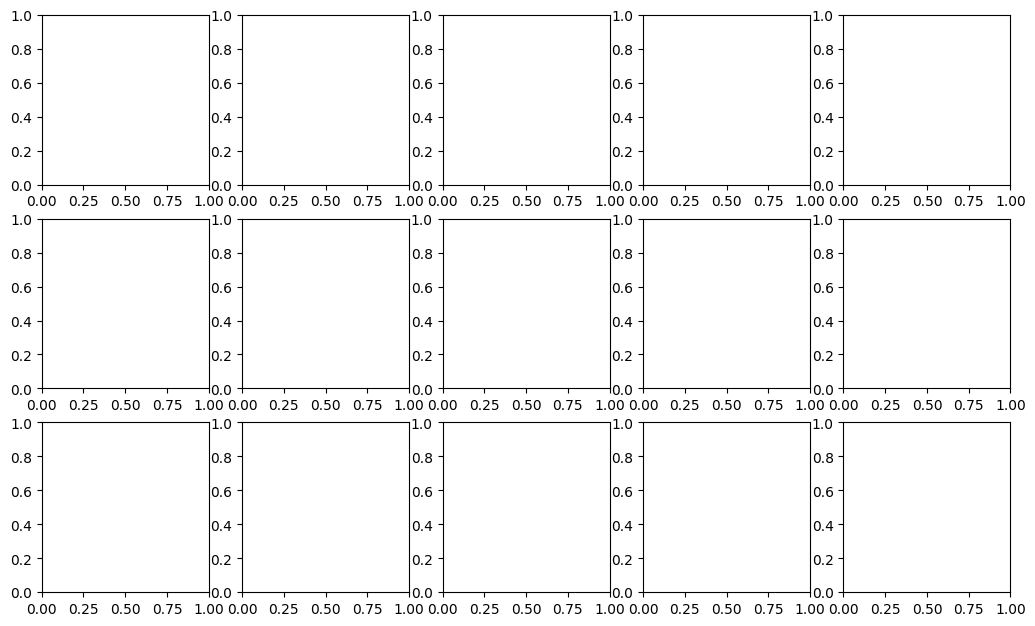

In [9]:
datatest = ImageDataset(datapath)   
datatest.load_pairs(5, 'test/sources', 'test/targets')
datatest.normalization(norm)
datatest.report()

if task == 'binary': measure = 'iou'
if task == 'nclass': measure = 'iou'  
if task == 'regres': measure = 'psnr'

prediction = Prediction(datatest, reportpath, 'model_best' + extension)
preds = prediction.test()
if task == 'binary': preds = np.where(preds > 0.5, 1, 0)
if task == 'nclass': preds = np.expand_dims(np.argmax(preds, axis=3), axis=3)
prediction.print_results(preds, task != 'regres')
prediction.figure_results(preds, measure)
prediction.save_results(preds)